<a href="https://colab.research.google.com/github/calebmckay1/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

sales_mean = (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) / 7


sales_std = (((3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689)*
              (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689)
              ) / sales_mean)**0.5


sales_var = ((sales[0] - sales_mean)*(sales[0] - sales_mean) / 6)**0.5

In [36]:
print(sales_mean)
print(sales_std)
print(sales_var)

# My equations must be way off. Mean is easy but the other ones I probably need 
# to work on by hand more.

3052.714285714286
386.75961526508945
184.64486965837003


In [42]:
# defining functions

def mean(value, ddof=0):
  return sum(value)/(len(value)-ddof)

mean(sales)

3052.714285714286

In [43]:
def var(value):
  variance = mean((value - mean(value))**2, ddof=1)
  return variance

var(sales)

# starting to get the hang of defining functions.

214387.90476190473

In [44]:
def std(value):
  standard = np.sqrt(var(value))
  return standard

std(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])

In [46]:
import pandas as pd
df = pd.DataFrame({'customers': customers, 'sales': sales})
df.head()

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700


In [47]:
covariance = df.cov()['sales']['customers']

covariance

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
customers_std = std(customers)
sales_std = std(sales)

In [49]:
covariance / (sales_std*customers_std)

0.9628339778148909

In [50]:
df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [51]:
import pandas as pd

titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [52]:
titanic_df = titanic_df.drop(titanic_df.columns[0], axis=1)
titanic_df = titanic_df.replace(('NA',np.NaN))

titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,11,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,11,135.0,"Montreal, PQ / Chesterville, ON",1


In [53]:
titanic_df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [54]:
titanic_df_sub = titanic_df[['fare','age','survived','pclass','body','sibsp']]
titanic_df_sub = titanic_df_sub.dropna()

titanic_df_sub.head()

,fare,age,survived,pclass,body,sibsp
3,151.5500,30.0,0.0,1.0,135.0,1.0
4,151.5500,25.0,0.0,1.0,135.0,1.0
5,26.5500,48.0,1.0,1.0,135.0,0.0
6,77.9583,63.0,1.0,1.0,135.0,1.0
7,0.0000,39.0,0.0,1.0,135.0,0.0


In [55]:
titanic_df_sub.isnull().sum()

fare        0
age         0
survived    0
pclass      0
body        0
sibsp       0
dtype: int64

In [56]:
titanic_covariance = titanic_df_sub.cov()
titanic_covariance

,fare,age,survived,pclass,body,sibsp
fare,2636.180013,119.195404,6.059583,-23.861421,-311.378988,8.644717
age,119.195404,164.990854,-0.308814,-4.018051,-19.912752,-2.542216
survived,6.059583,-0.308814,0.236026,-0.126799,-0.125430,-0.013819
pclass,-23.861421,-4.018051,-0.126799,0.699561,-0.350115,0.053404
body,-311.378988,-19.912752,-0.125430,-0.350115,8677.150279,-9.616723
sibsp,8.644717,-2.542216,-0.013819,0.053404,-9.616723,1.086329


In [57]:
titanic_correlation = titanic_df_sub.corr()
titanic_correlation

,fare,age,survived,pclass,body,sibsp
fare,1.000000,0.180735,0.242927,-0.555643,-0.065105,0.161541
age,0.180735,1.000000,-0.049487,-0.374001,-0.016642,-0.189890
survived,0.242927,-0.049487,1.000000,-0.312050,-0.002772,-0.027291
pclass,-0.555643,-0.374001,-0.312050,1.000000,-0.004494,0.061261
body,-0.065105,-0.016642,-0.002772,-0.004494,1.000000,-0.099051
sibsp,0.161541,-0.189890,-0.027291,0.061261,-0.099051,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

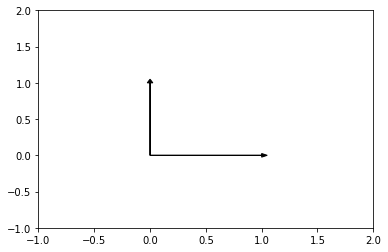

In [58]:
import matplotlib.pyplot as plt

o1 = np.array([0,1])
o2 = np.array([1,0])
plt.arrow(0, 0, o1[0], o1[1], head_width=.05, head_length=.05, color = 'black')
plt.arrow(0, 0, o2[0], o2[1], head_width=.05, head_length=.05, color = 'black')

plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.show()

# synonym would be perpendicular, right angles, like the graph shows below.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [59]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

dot_product = np.vdot(a, b)
dot_product

# no they are not because their dot product doesnt equal 0

# number 3

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [60]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c)**2) # the norm squared
print(np.dot(c,c)) # the dot product
print(np.matmul(c.T, c)) # the matrix

# the dot product and the matrix is the same as the squared value of the norm.

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

###not sure if this is latex###
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

> |

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j}-8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])

In [65]:
f_unit_v = f / np.linalg.norm(f)
f_unit_v

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

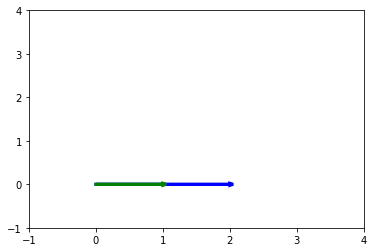

In [71]:
plt.xlim(-1,4)
plt.ylim(-1,4)

v1 = [1,0]
v2 = np.multiply(2,v1)

plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.show()


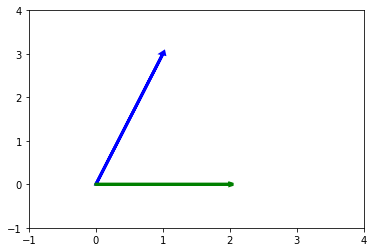

In [75]:
plt.xlim(-1,4)
plt.ylim(-1,4)

iv1 = [2,0]
iv2 = [1,3]

plt.arrow(0,0, iv2[0], iv2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, iv1[0], iv1[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# not really sure what this is asking maybe 

# [g1 + h4, g2 +h8]

# could be that their span is just a line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# going to need help on this portion.
# kind of understand it but not sure how to calculate it

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# not sure what this is either its almost 3am here, and havent found 
# any answers for any of this for past couple hours.

## 6.2 What does it mean to form a basis?

vectors that lineally independant but not sure what vector space means

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# not too sure on this one either

## 7.2 What does the rank of a matrix tell us?

tells us if its linerally independant

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()